# Sklearn

## sklearn.neighbors

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import  model_selection, datasets, metrics, neighbors 

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [6]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

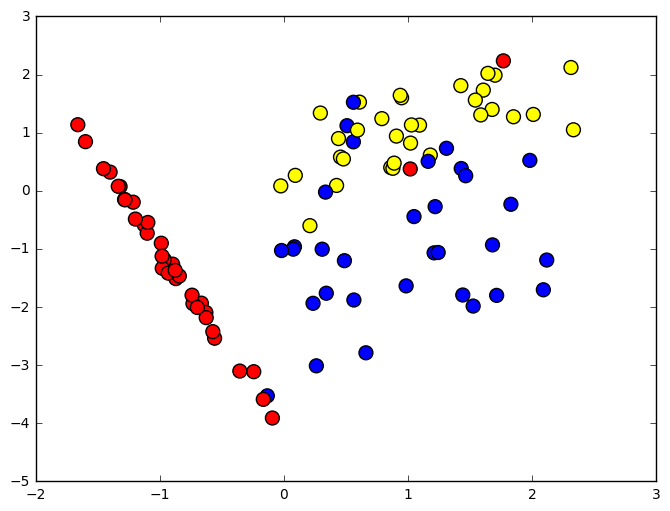

In [7]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [8]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель KNeighborsClassifier

In [9]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.76666666666666672

In [11]:
predictions

array([2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 0, 0])

### Разделяющая поверхность

In [12]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [13]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

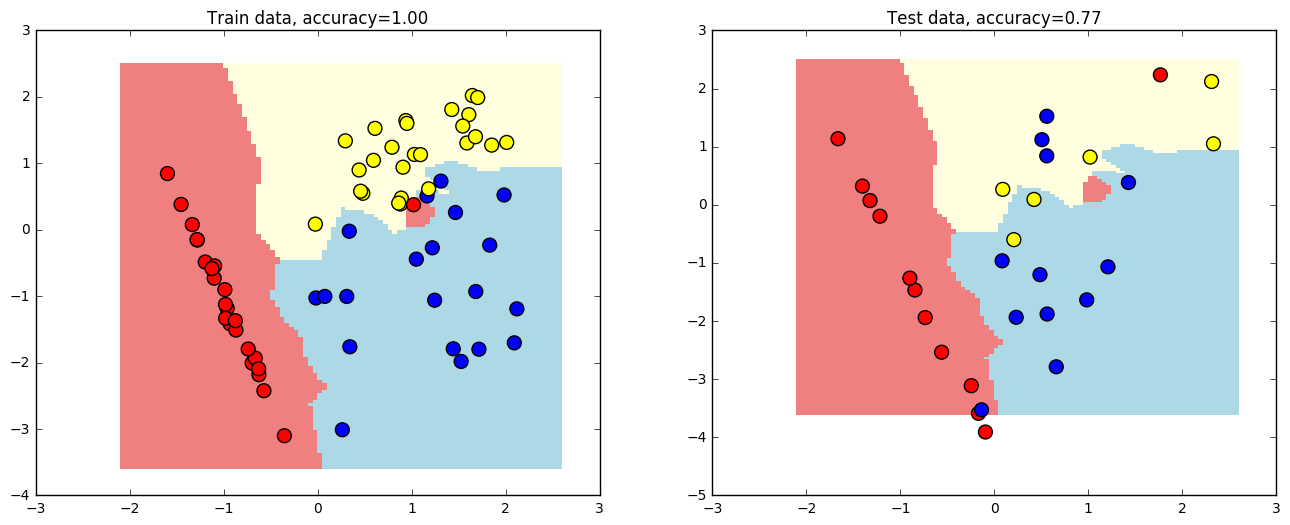

In [14]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

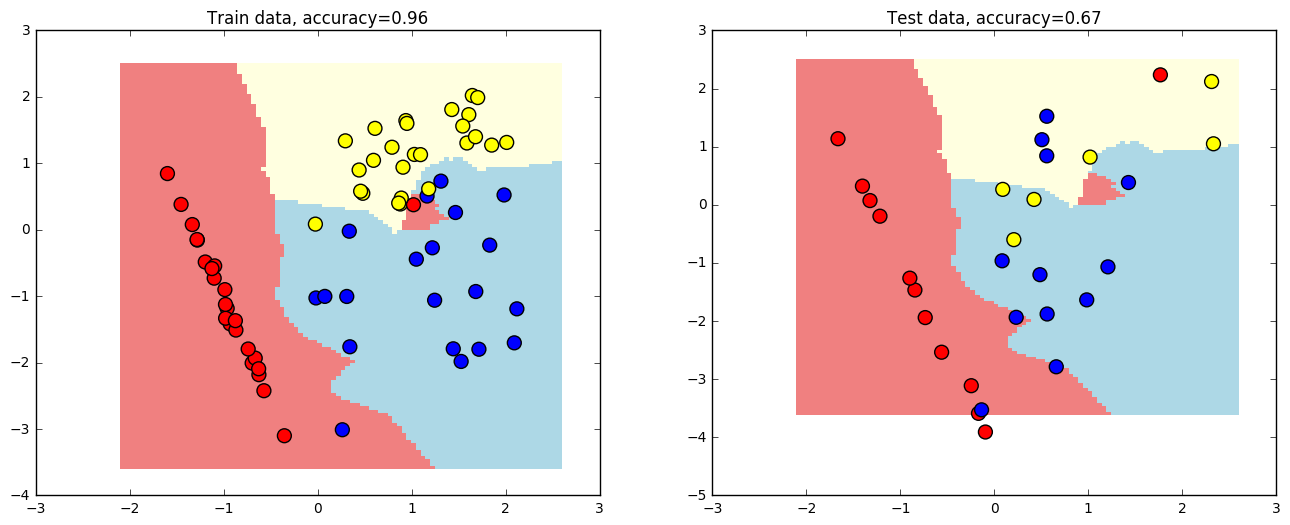

In [15]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

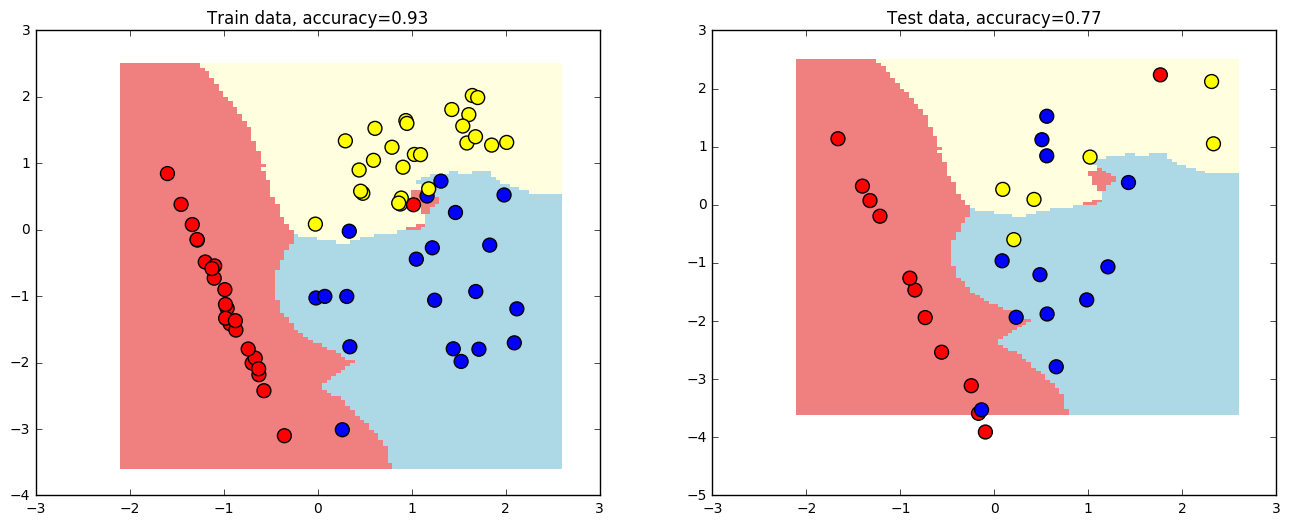

In [16]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

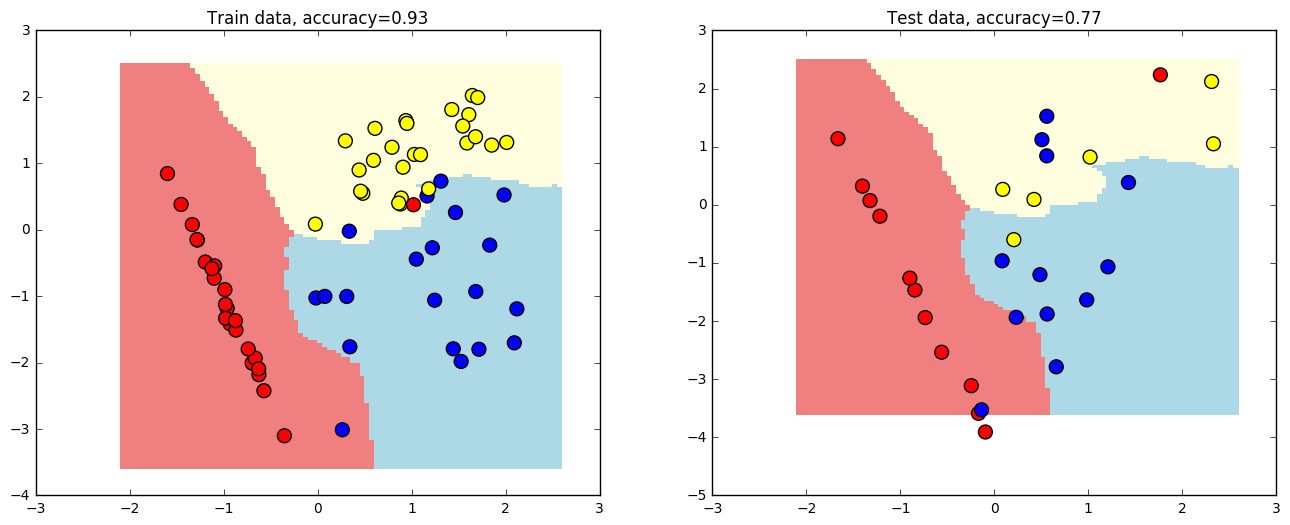

In [17]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

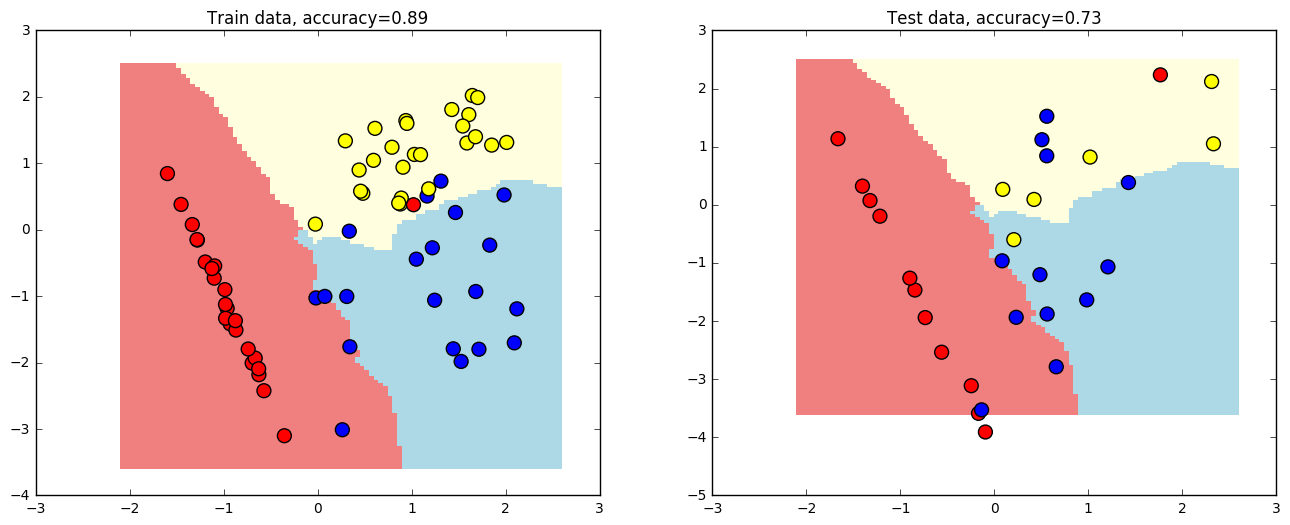

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

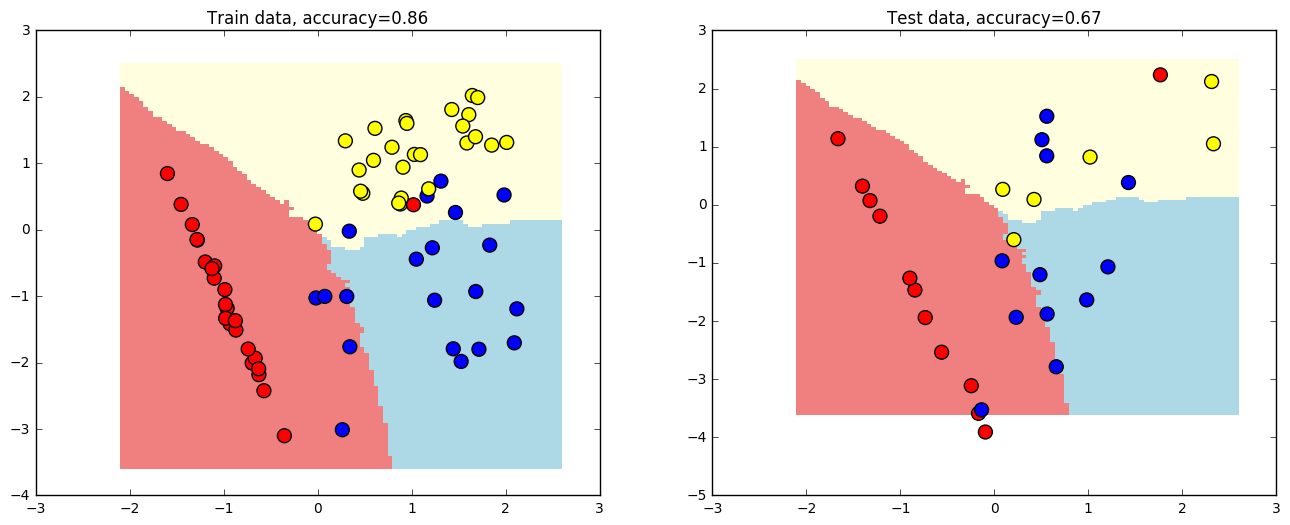

In [19]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

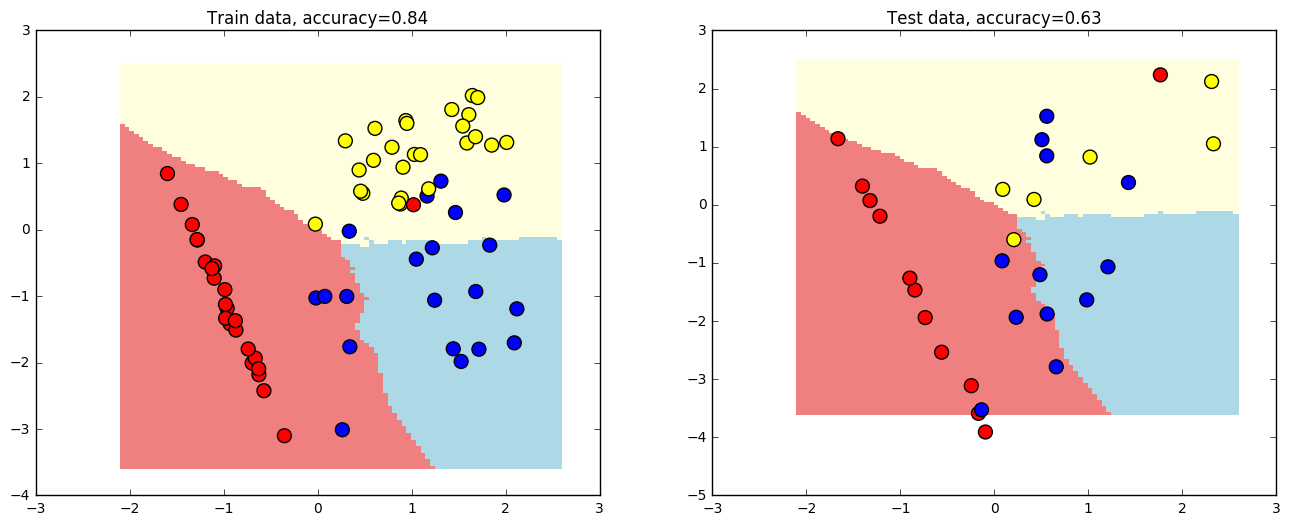

In [20]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

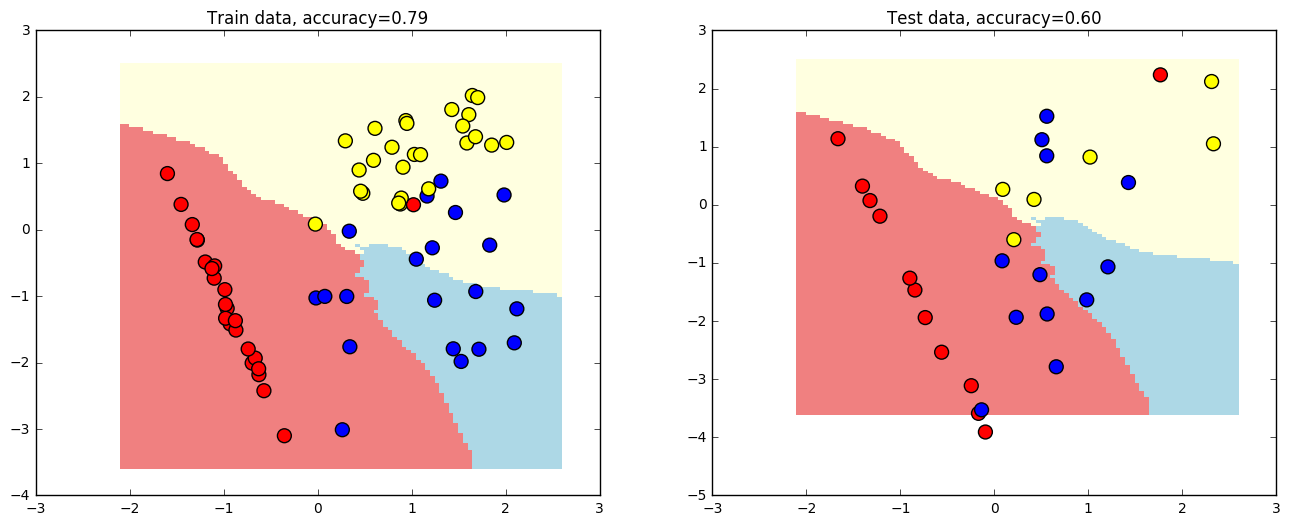

In [21]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [25]:
def train_accuracy(estimator, train_data, train_labels, test_data, test_labels):
    estimator.fit(train_data, train_labels)
    return metrics.accuracy_score(train_labels, estimator.predict(train_data))

def test_accuracy(estimator, train_data, train_labels, test_data, test_labels):
    estimator.fit(train_data, train_labels)
    return metrics.accuracy_score(test_labels, estimator.predict(test_data))

In [26]:
train_acc = []
test_acc = []
for k in range (1, 40):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    train_acc.append(train_accuracy(estimator, train_data, train_labels, test_data, test_labels))
    test_acc.append(test_accuracy(estimator, train_data, train_labels, test_data, test_labels))

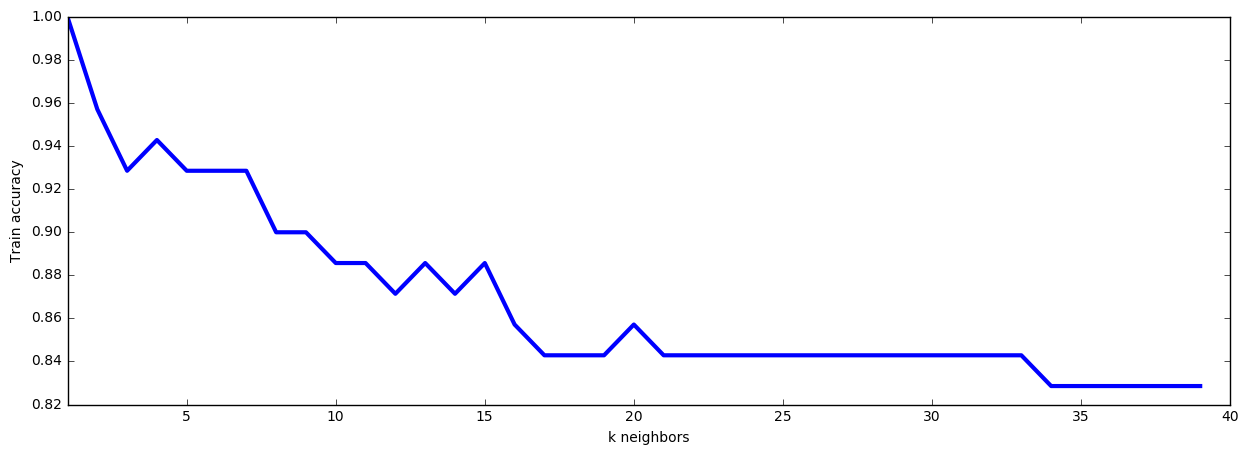

In [44]:
plt.figure(figsize = (15, 5))
plt.plot(range(1,40), train_acc, linewidth = 3.0, color = 'b')
plt.xlabel("k neighbors")
plt.ylabel("Train accuracy")
plt.xlim((1, 40))
plt.show()

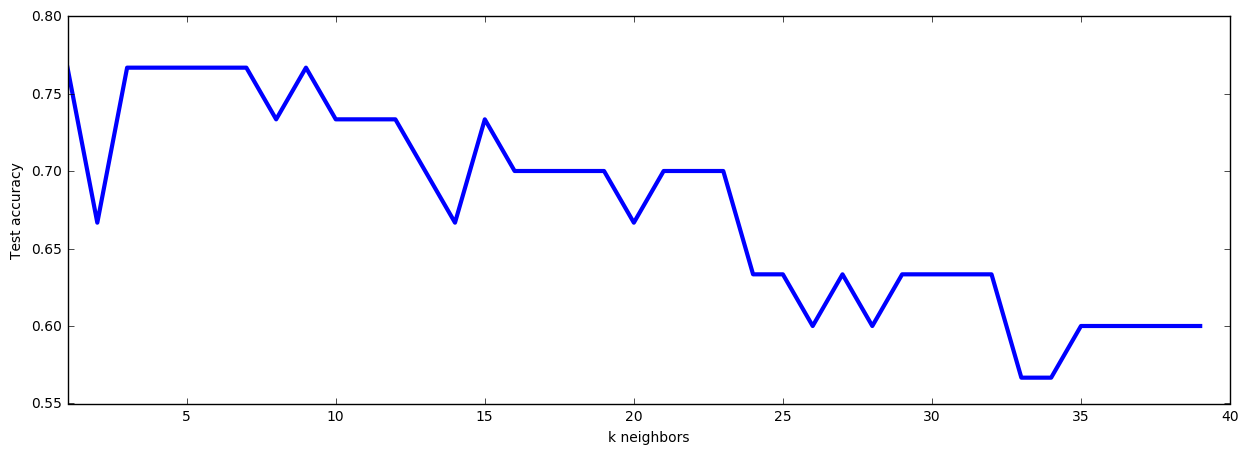

In [45]:
plt.figure(figsize = (15, 5))
plt.plot(range(1,40), test_acc, linewidth = 3.0, color = 'b')
plt.xlabel("k neighbors")
plt.ylabel("Test accuracy")
plt.xlim((1, 40))
plt.show()

In [53]:
print "Оптимальное значение k на train:", [i for i, j in enumerate(train_acc) if j == max(train_acc)]

 Оптимальное значение k на train: [0]


In [54]:
print "Оптимальное значение k на test:", [i for i, j in enumerate(test_acc) if j == max(test_acc)]

Оптимальное значение k на test: [0, 2, 3, 4, 5, 6, 8]
